In [ ]:
# https://github.com/dgriffiths3/ml_segmentation/blob/master/README.md

Link: https://github.com/dgriffiths3/ml_segmentation/blob/master/README.md

NUMBERS | PATHS

Total images: 3249

Train images: 2599 80% | X_train = "/images" | y_train = "/labels"

Test images: 650 20% | X_test = "/outputs/test_images" | y_test = "/labels/ground_truth"











In [2]:
!pip install numpy
!pip install mahotas
!pip install glob
!pip install cv2

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 5.7 MB 6.1 MB/s 
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
ERROR: Could not find a version that satisfies the requirement glob (from versions: none)
ERROR: No matching distribution found for glob
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
ERROR: Could not find a version that satisfies the requirement cv2 (from versions: none)
ERROR: No matching distribution found for cv2


In [3]:
from glob import glob
import cv2
import matplotlib.pyplot as plt
import imageio as iio
import os

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
# Move to the directory of the project
%cd "/content/drive/MyDrive/Final Project/AstroStatLearn/code/Baseline/ml_segmentation-master"

/content/drive/.shortcut-targets-by-id/12oB0yfCn8EnscXWd4KOG5iZW5xfunRqy/Final Project/AstroStatLearn/code/Baseline/ml_segmentation-master


In [47]:
#############################
####### RUN ONE TIME ########
#############################

# Number of files in images folder and delete images to arrive at most 500 jpgs
dir_path = r'pots/outputs/ground_truth'
print("Before: ", len([entry for entry in os.listdir(dir_path) if os.path.isfile(os.path.join(dir_path, entry))]))

for i in range(2698,3248):
  os.remove(dir_path + "/" + str(i).zfill(6) + ".jpg")

print("After: ", len([entry for entry in os.listdir(dir_path) if os.path.isfile(os.path.join(dir_path, entry))]))

Before:  650
After:  100


In [33]:
!python train.py -i "./pots/images" -l "./pots/labels" -c "RF" -o "./pots/outputs/random_forest.p"

[INFO] Reading image data.
100% 500/500 [02:40<00:00,  3.12it/s]
[INFO] Creating training dataset on 500 image(s).
  0% 0/500 [00:00<?, ?it/s][INFO] Computing local binary pattern features.
[INFO] Computing haralick features.
  0% 1/500 [00:10<1:25:06, 10.23s/it][INFO] Computing local binary pattern features.
[INFO] Computing haralick features.
  0% 2/500 [00:19<1:21:03,  9.77s/it][INFO] Computing local binary pattern features.
[INFO] Computing haralick features.
  1% 3/500 [00:26<1:10:34,  8.52s/it][INFO] Computing local binary pattern features.
[INFO] Computing haralick features.
  1% 4/500 [00:33<1:05:36,  7.94s/it][INFO] Computing local binary pattern features.
[INFO] Computing haralick features.
  1% 5/500 [00:40<1:03:06,  7.65s/it][INFO] Computing local binary pattern features.
[INFO] Computing haralick features.
  1% 6/500 [00:50<1:07:44,  8.23s/it][INFO] Computing local binary pattern features.
[INFO] Computing haralick features.
  1% 7/500 [00:58<1:06:58,  8.15s/it][INFO] Comp

In [57]:
!python inference.py -i "./pots/outputs/test_images" -m "./pots/outputs/random_forest.p" -o "./pots/outputs/computed_by_model"

[INFO] Running inference on 100 test images
[INFO] Processing images: 002599.jpg
[INFO] Computing local binary pattern features.
[INFO] Computing haralick features.
[======================================================================== ]  98%[INFO] Processing images: 002600.jpg
[INFO] Computing local binary pattern features.
[INFO] Computing haralick features.
[======================================================================== ]  98%[INFO] Processing images: 002605.jpg
[INFO] Computing local binary pattern features.
[INFO] Computing haralick features.
[======================================================================== ]  98%[INFO] Processing images: 002602.jpg
[INFO] Computing local binary pattern features.
[INFO] Computing haralick features.
[======================================================================== ]  98%[INFO] Processing images: 002606.jpg
[INFO] Computing local binary pattern features.
[INFO] Computing haralick features.
[==============================

In [60]:
!python evaluation.py -i "./pots/outputs/test_images" -g "./pots/outputs/ground_truth"

[INFO] Evaluating Results...
[INFO] Performing segmentation evaluation...
[INFO] 100 images to process
[=========================================================================] 100%
--------------------------------------------------------
[RESULTS] PRECISION: 0.1259
[RESULTS] RECALL: 0.4434
[RESULTS] ACCURACY: 75.6170 %
[RESULTS] F1 VALUE: 0.1873
--------------------------------------------------------
Processing Time 1.16 seconds


In [17]:
def show_test_prediction_truth(image_number):
  path = "/content/drive/MyDrive/Final Project/AstroStatLearn/code/Baseline/ml_segmentation-master/pots/outputs"

  # Open images
  test_image = iio.imread(str(path + "/test_images/" + str(image_number).zfill(6) + ".jpg"))
  model_computed_image = iio.imread(str(path + "/computed_by_model/" + str(image_number).zfill(6) + ".jpg"))
  ground_truth_image = iio.imread(str(path + "/ground_truth/" + str(image_number).zfill(6) + ".jpg"))
  
  # Plot images
  fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(18,9))
  ax1.set_title("TEST IMAGE " + str(image_number))
  ax2.set_title("MODEL PREDICTION")
  ax3.set_title("GROUND TRUTH")
  im1  = ax1.imshow(test_image,  cmap='gray')
  im2  = ax2.imshow(model_computed_image,  cmap='gray')
  im3  = ax3.imshow(ground_truth_image,  cmap='gray')
  fig.colorbar(im1, ax=ax1, fraction=0.046, pad=0.04)
  fig.colorbar(im2, ax=ax2, fraction=0.046, pad=0.04)
  fig.colorbar(im3, ax=ax3, fraction=0.046, pad=0.04);

In [8]:
%ls "pots/outputs/computed_by_model"

002599.jpg  002600.jpg  002602.jpg  002605.jpg  002606.jpg


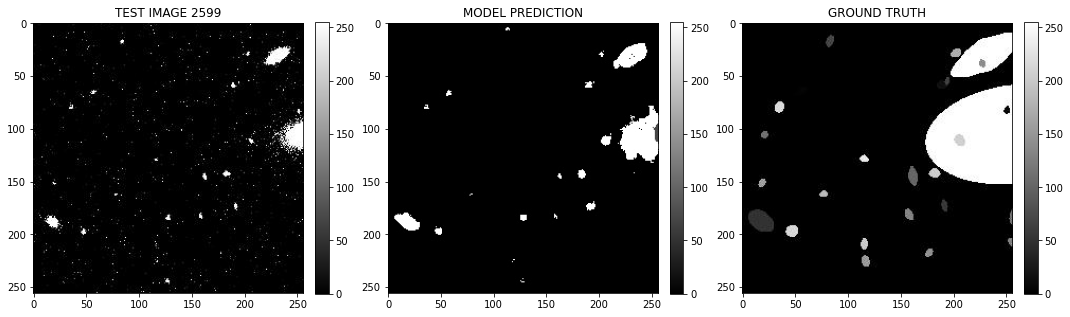

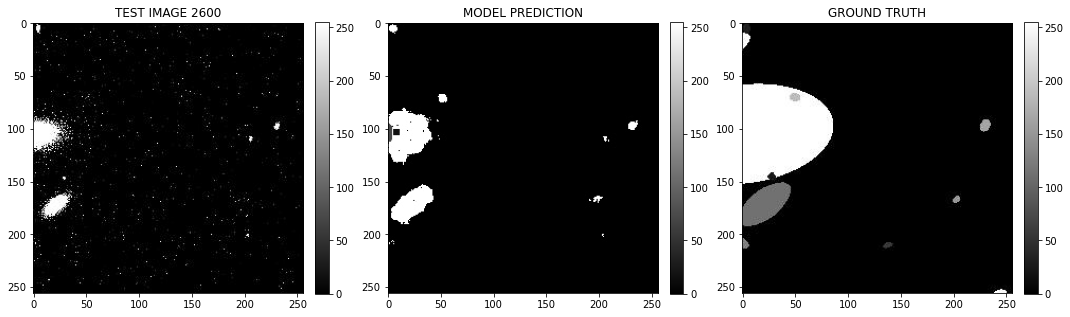

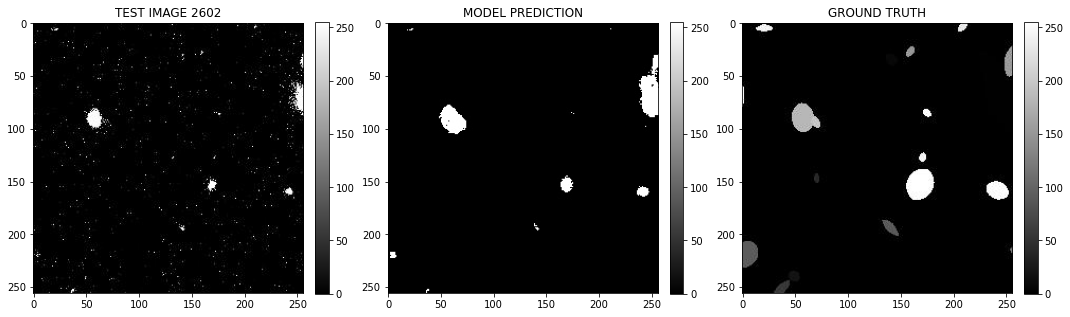

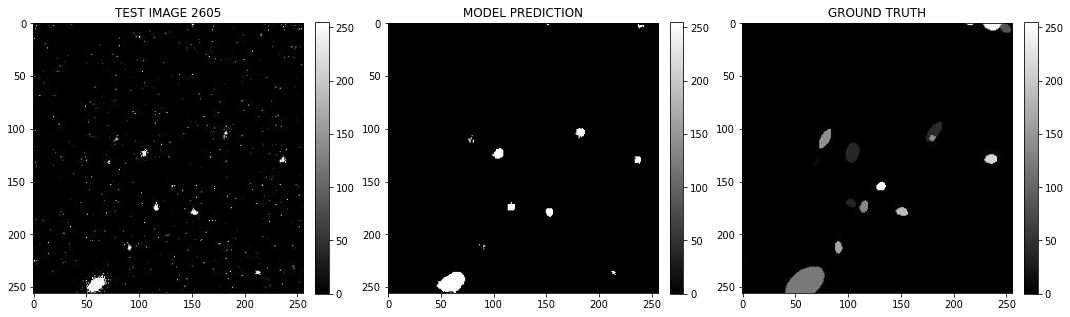

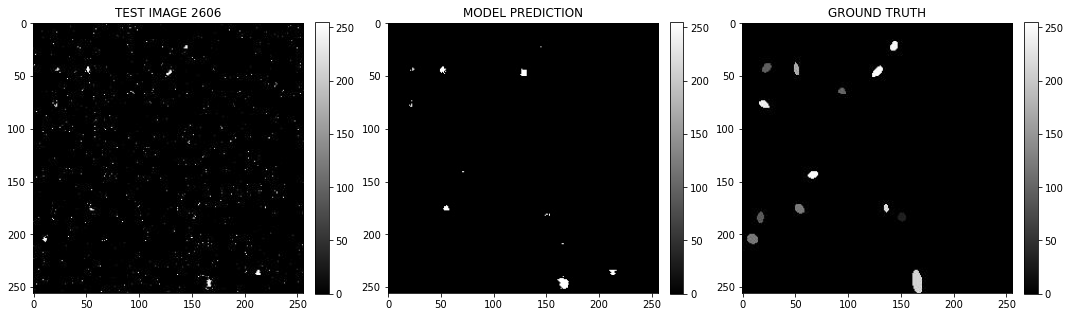

In [18]:
show_test_prediction_truth(image_number=2599)
show_test_prediction_truth(image_number=2600)
show_test_prediction_truth(image_number=2602)
show_test_prediction_truth(image_number=2605)
show_test_prediction_truth(image_number=2606)